In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [5]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
df['Fuel_Type']=label_en.fit_transform(df['Fuel_Type'])


In [9]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [10]:
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
import seaborn as sns

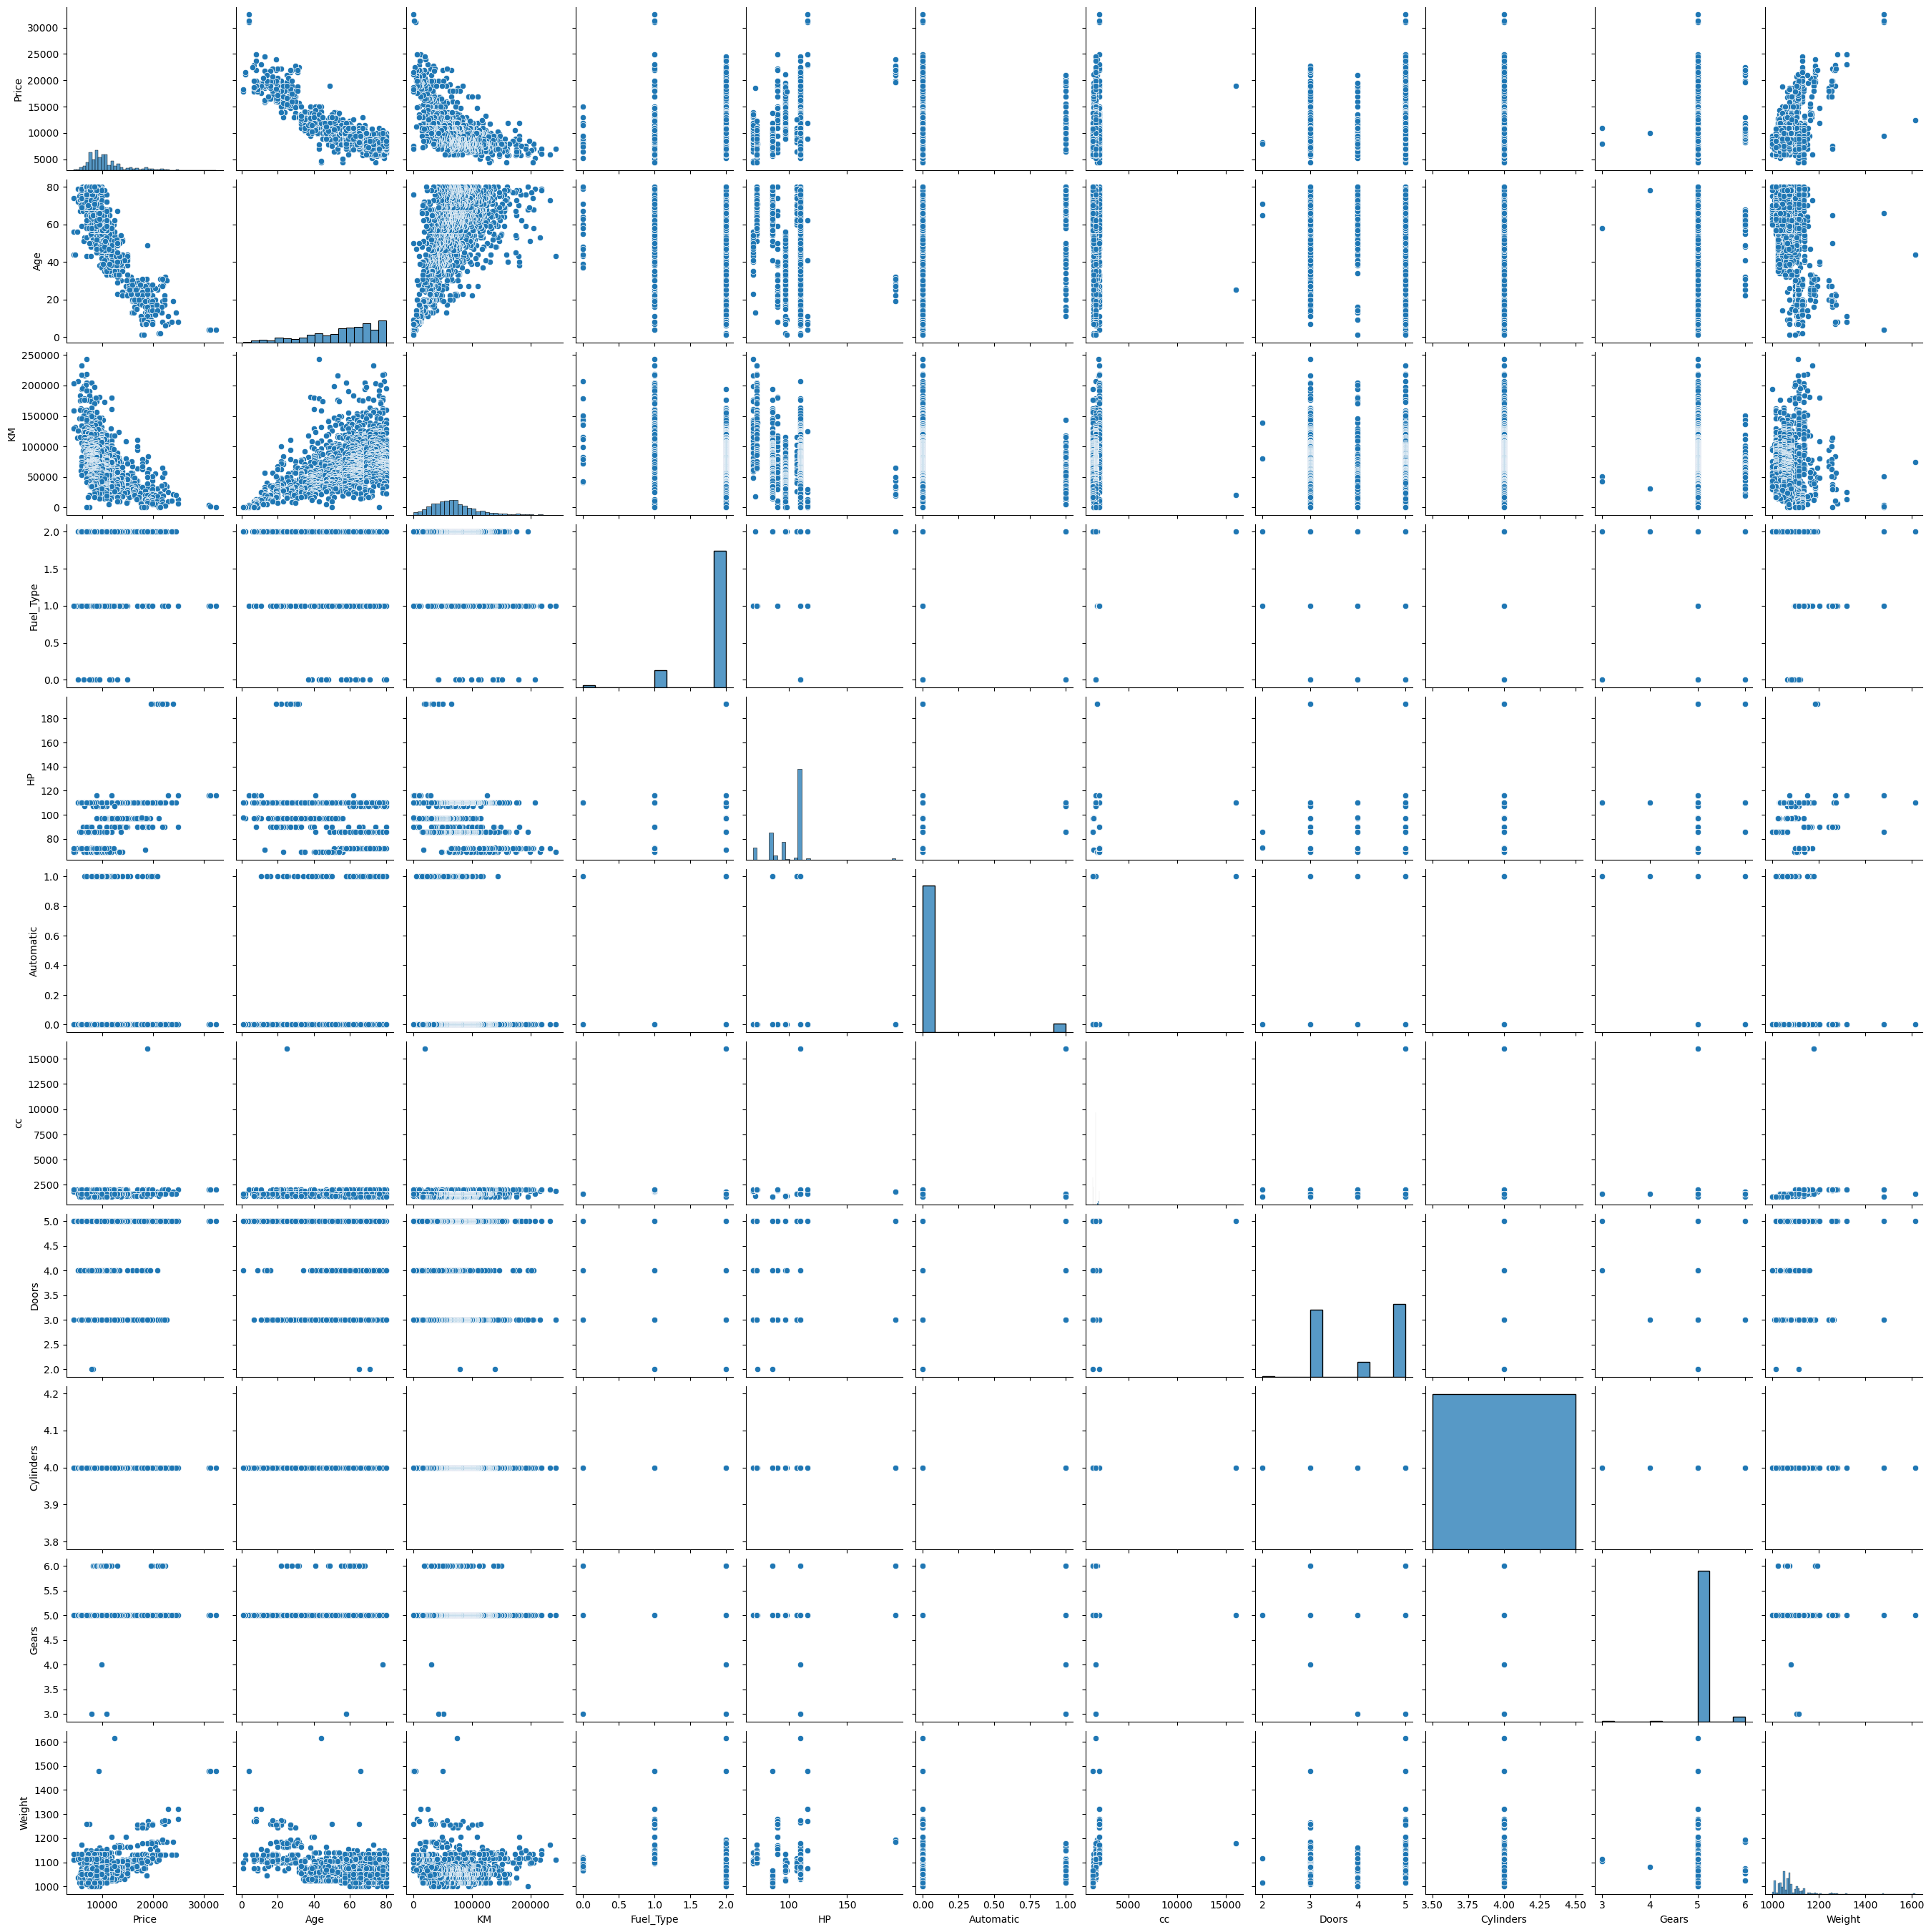

In [12]:
sns.pairplot(df)

In [13]:
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [14]:
[df[df.duplicated()]]

[     Price  Age     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
 113  24950    8  13253          1  116          0  2000      5          4   
 
      Gears  Weight  
 113      5    1320  ]

In [15]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [16]:
[df[df.duplicated()]]

[Empty DataFrame
 Columns: [Price, Age, KM, Fuel_Type, HP, Automatic, cc, Doors, Cylinders, Gears, Weight]
 Index: []]

In [17]:
num_columns=[i for i in df.columns if (df[i].dtypes!='0')]
num_columns

['Price',
 'Age',
 'KM',
 'Fuel_Type',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

<Axes: >

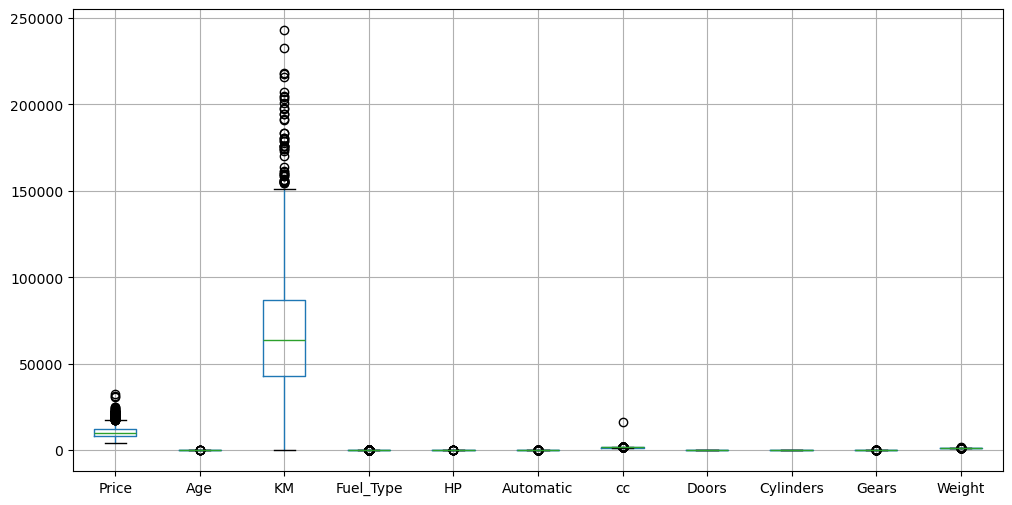

In [18]:
figure=plt.figure(figsize=(12,6))
df.boxplot(column=num_columns)

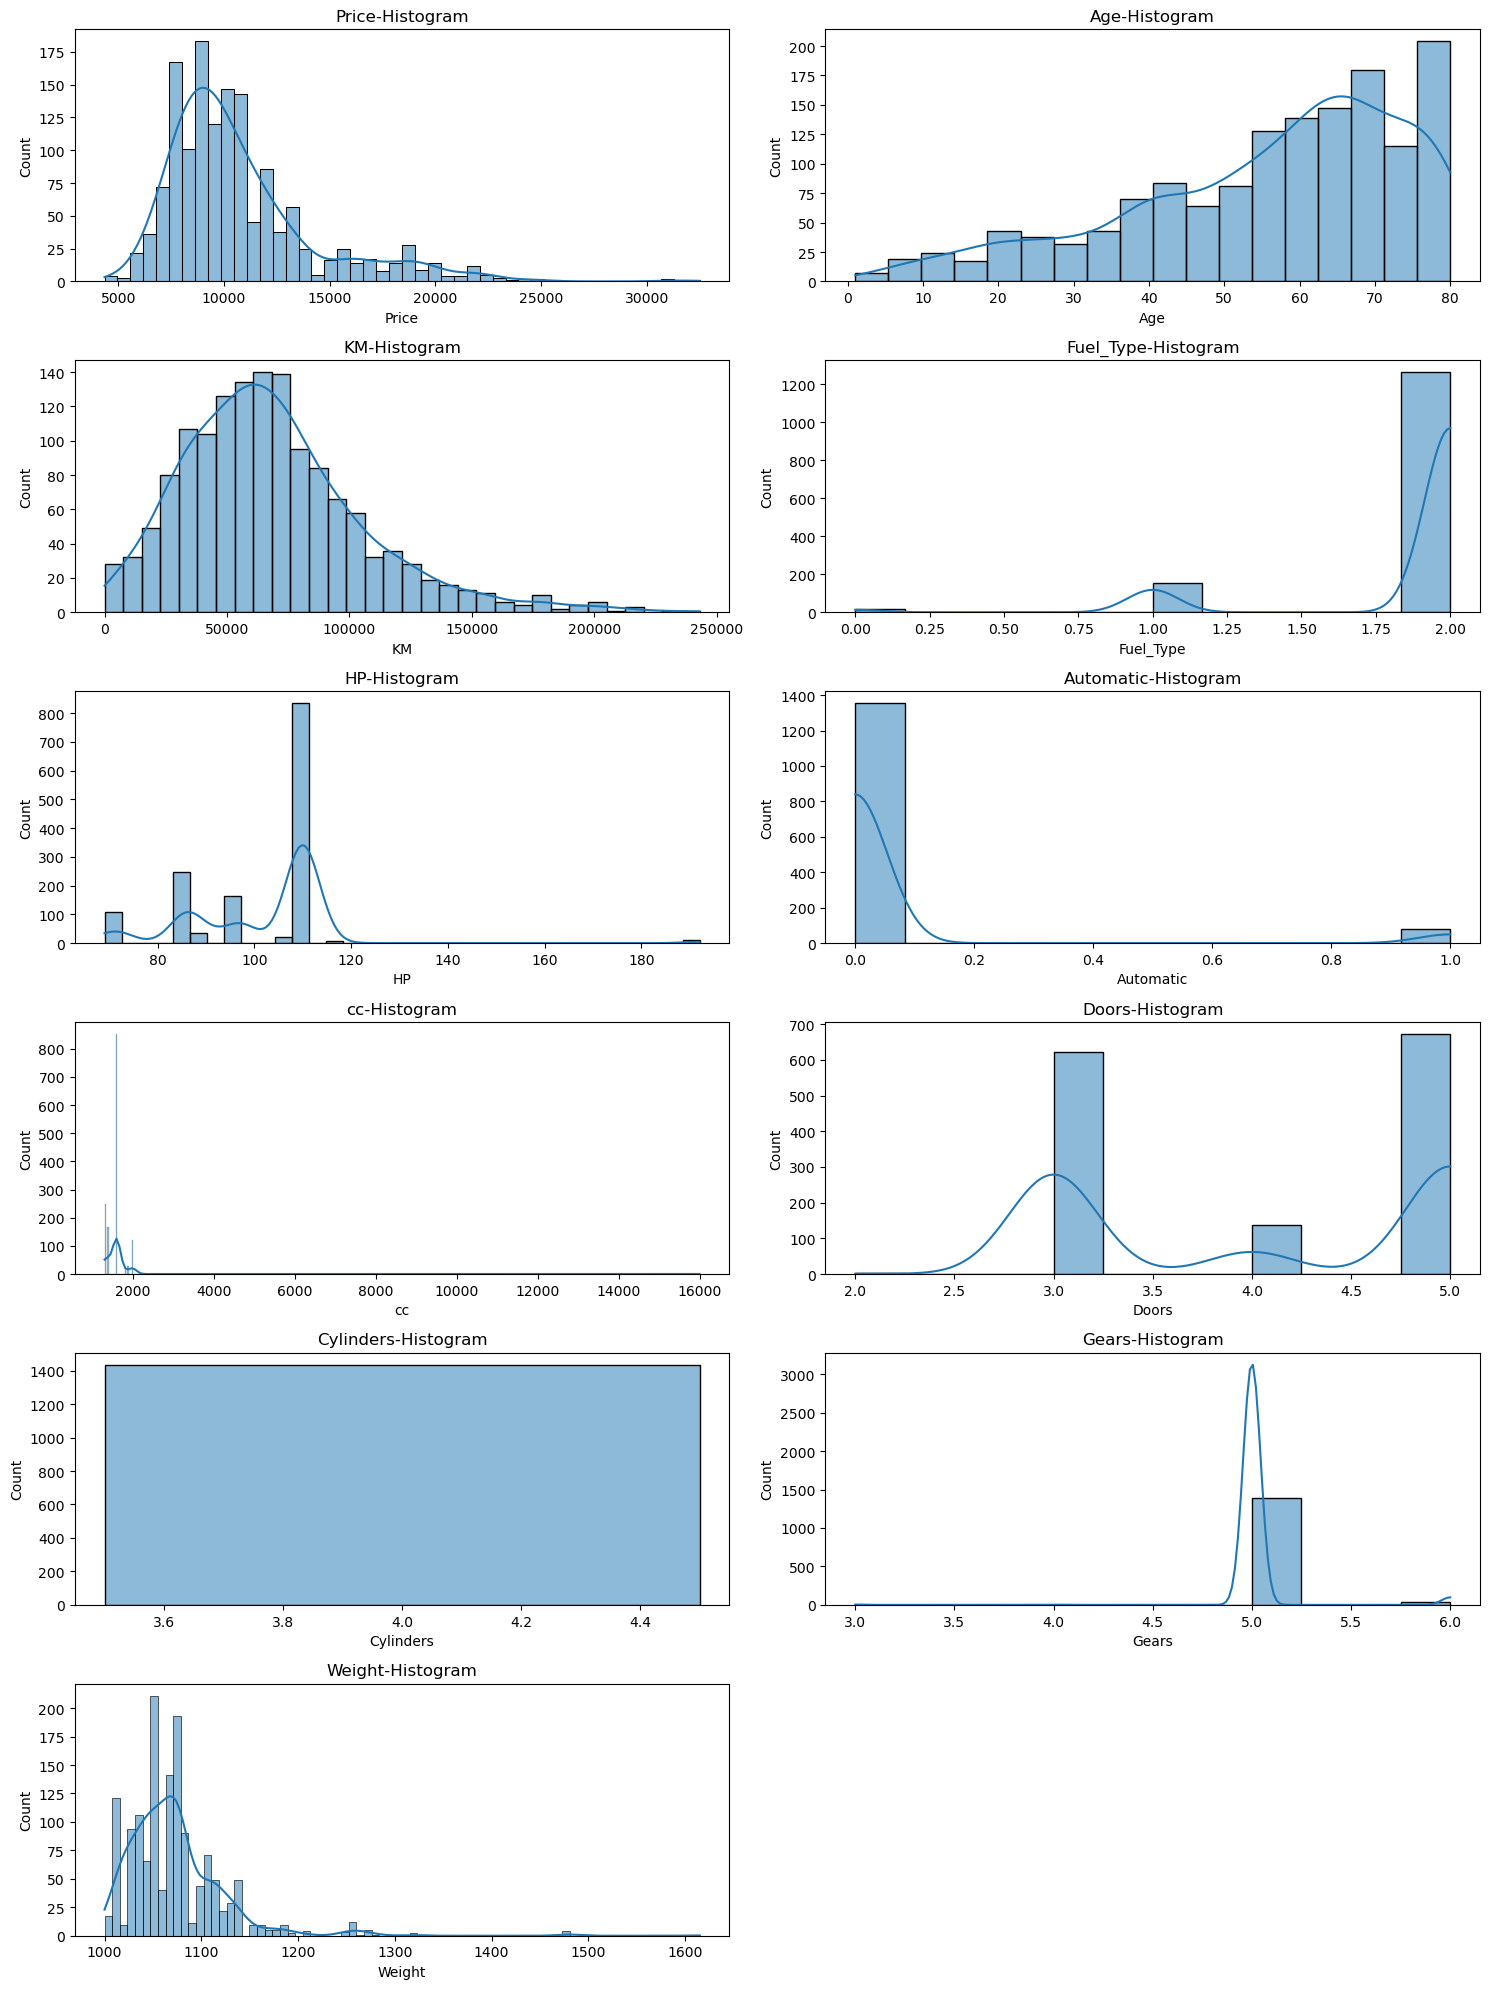

In [19]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df[num_columns]):
    plt.subplot(len(df.columns)//2+1,2,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'{column}-Histogram')
plt.tight_layout()    
plt.show() 
    

In [20]:
target=df[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [21]:
features=df.drop('Price',axis=1)
features

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,2,86,0,1300,3,4,5,1025
1431,72,19000,2,86,0,1300,3,4,5,1015
1432,71,17016,2,86,0,1300,3,4,5,1015
1433,70,16916,2,86,0,1300,3,4,5,1015


In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [23]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=100,train_size=0.75)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 10)
(359, 10)
(1076, 1)
(359, 1)


In [25]:
linear_reg=LinearRegression()

In [26]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=linear_reg.predict(x_test)


In [28]:
r2_score(y_test,y_pred)

0.8722609389806824

In [29]:
linear_reg.coef_


array([[-1.24444956e+02, -1.69768422e-02,  4.69902048e+02,
         2.64283308e+01,  4.42307559e+02, -1.57418164e-02,
        -5.25213313e+00,  1.13686838e-13,  7.45158061e+02,
         1.91417115e+01]])

In [30]:
linear_reg.intercept_

array([-8961.67994057])

In [31]:
mse=mean_squared_error(y_test,y_pred)
mse

1631811.8716668794

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mae

946.0484331526125

In [33]:
from sklearn.linear_model import Lasso,Ridge
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [34]:
y_pred1=lasso.predict(x_test)

In [35]:
r2_score(y_test,y_pred1)

0.8723385091240845

In [36]:
lasso.coef_

array([-1.24388035e+02, -1.70351242e-02,  4.56256301e+02,  2.66158594e+01,
        4.20796746e+02, -1.56446063e-02, -4.95554544e+00,  0.00000000e+00,
        7.14537709e+02,  1.91047267e+01])

In [37]:
lasso.intercept_

array([-8761.02039146])

In [38]:
params={'alpha':[1,2,3,4,5,6,7,8,9,10]}


In [39]:
gridsearch=GridSearchCV(lasso,params)

In [40]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [41]:
gridsearch.best_params_

{'alpha': 1}

In [42]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=50,train_size=0.80)

In [43]:
ridge=Ridge(alpha=1)

In [44]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [45]:
y_pred2=ridge.predict(x_test)

In [46]:
r2_score(y_test,y_pred2)

0.677644839548236

In [47]:
ridge.coef_

array([[-1.22131433e+02, -1.51098079e-02,  4.70556577e+02,
         2.34685883e+01,  1.89351864e+02, -1.71425066e+00,
        -7.40614559e+01,  0.00000000e+00,  5.48526323e+02,
         2.57033028e+01]])

In [48]:
ridge.intercept_

array([-12002.07798391])

## What is Normalization & Standardization and how is it helpful?
  Normalization scales data to a range of [0, 1], making all values small and comparable.
  Standardization shifts data to have a mean of 0 and a standard deviation of 1. Both help
  models work better by preventing large values from dominating. Use normalization for data
  without a normal shape and standardization for normally distributed data.

## What techniques can be used to address multicollinearity in multiple linear regression?
  Remove highly correlated features to eliminate redundancy.
  Use Ridge Regression to penalize large coefficients.
  Apply Principal Component Analysis to transform correlated features into independent components.
  Check Variance Inflation Factor and remove variables with high VIF values.
  Increase sample size to reduce the impact of multicollinearity.
